```
This software is a part of GPU Ocean.

Copyright (C) 2024  SINTEF Digital

This notebook shows how to obtain initial conditions for the double jet 
numerical experiment for arbitrary grid resolutions.

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.
```

# Double Jet initial conditions 

This notebook loads initial conditions and plot crossections of the for any $x$.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rc

from importlib import reload

#Set large figure sizes
rc('figure', figsize=(8.0, 5.0))
rc('animation', html='html5')

from gpuocean.utils import IPythonMagic, DoubleJetCase

In [2]:
%cuda_context_handler gpu_ctx

The initial conditions along with the simulator and model error arguments are generated by the class `DoubleJetCase`. 

In [3]:
nx = 512
ny = 256

steadyStateCase = DoubleJetCase.DoubleJetCase(gpu_ctx, model_error=0, nx=nx, ny=ny)
args , init, _ = steadyStateCase.getInitConditions()

The initial conditions are in the dict `init`, and are of size `(ny+4, nx+4)`. The reason for this is that the simulator requires two ghost cells around the computational domain for handling boundary conditions.

Text(0.5, 1.0, 'Initial $hv$ [m$^2$/s]')

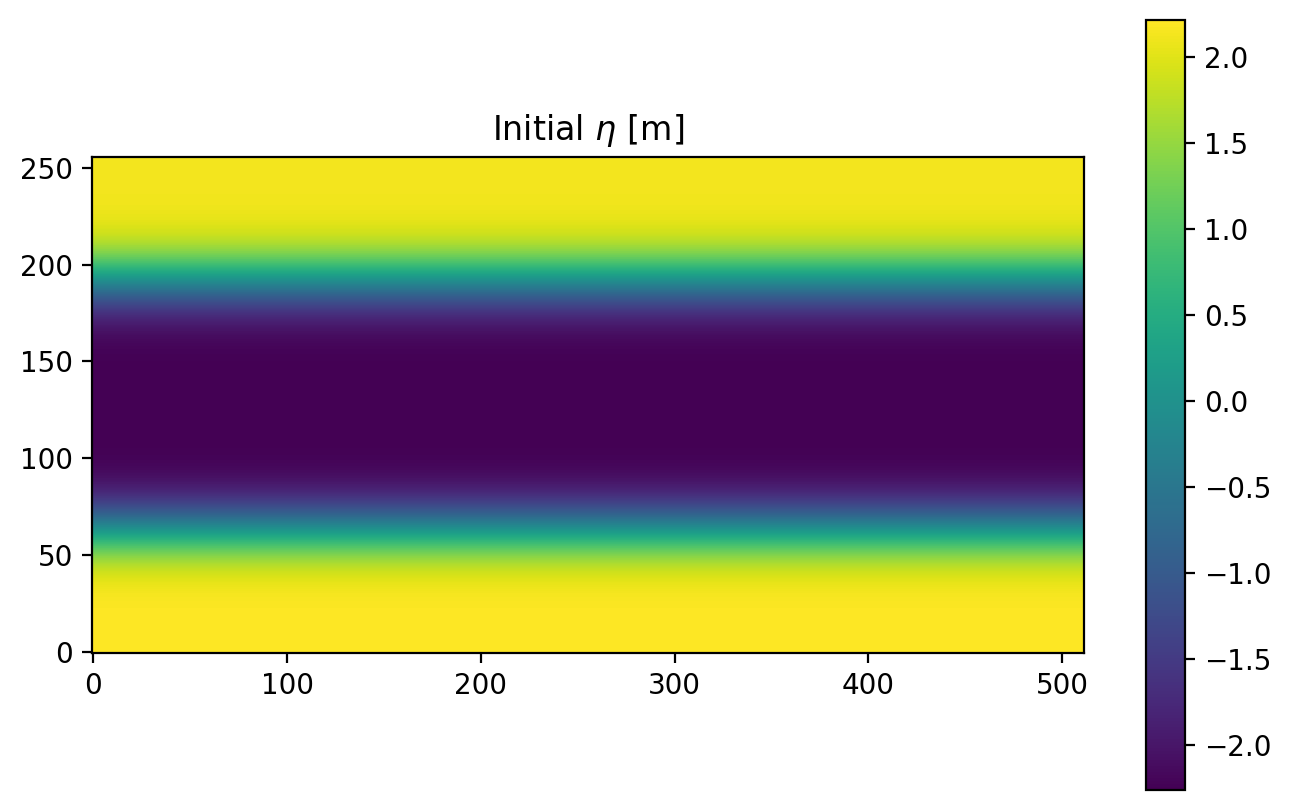

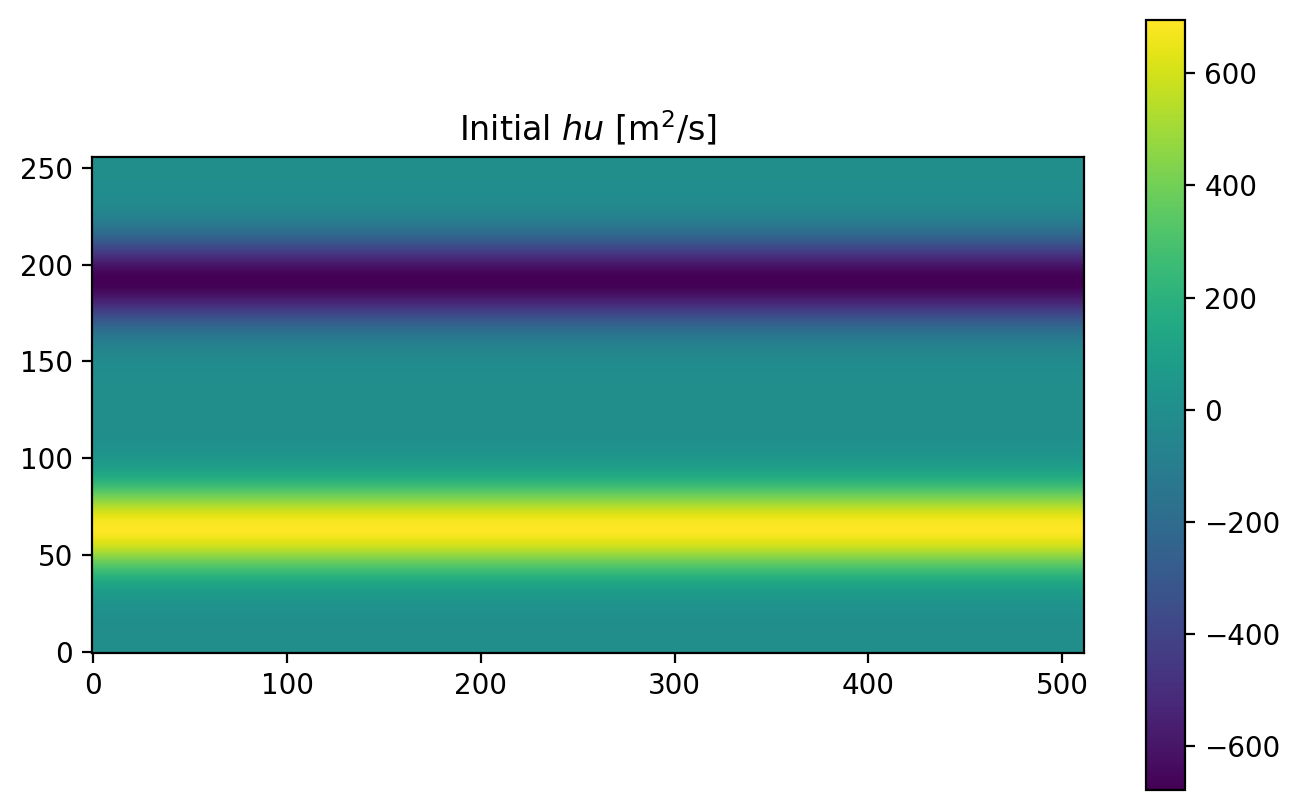

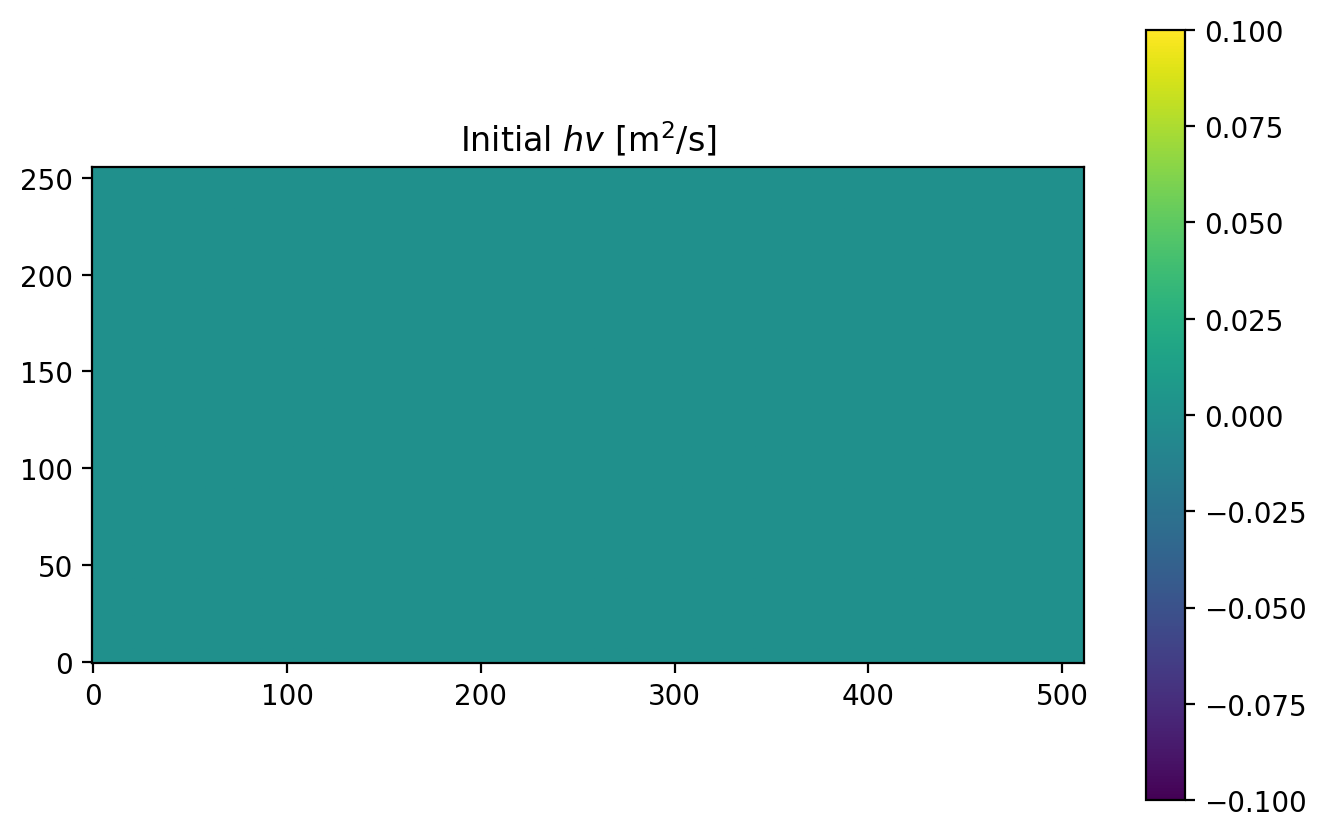

In [4]:
fig = plt.figure()
plt.imshow(init['eta0'][2:-2, 2:-2], origin='lower')
plt.colorbar()
plt.title("Initial $\eta$ [m]")

fig = plt.figure()
plt.imshow(init['hu0'][2:-2, 2:-2], origin='lower')
plt.colorbar()
plt.title("Initial $hu$ [m$^2$/s]")

fig = plt.figure()
plt.imshow(init['hv0'][2:-2, 2:-2], origin='lower')
plt.colorbar()
plt.title("Initial $hv$ [m$^2$/s]")


Cross section along $y$

256 256
(2601.5625, 666000.0) (1300.78125, 1300.78125)


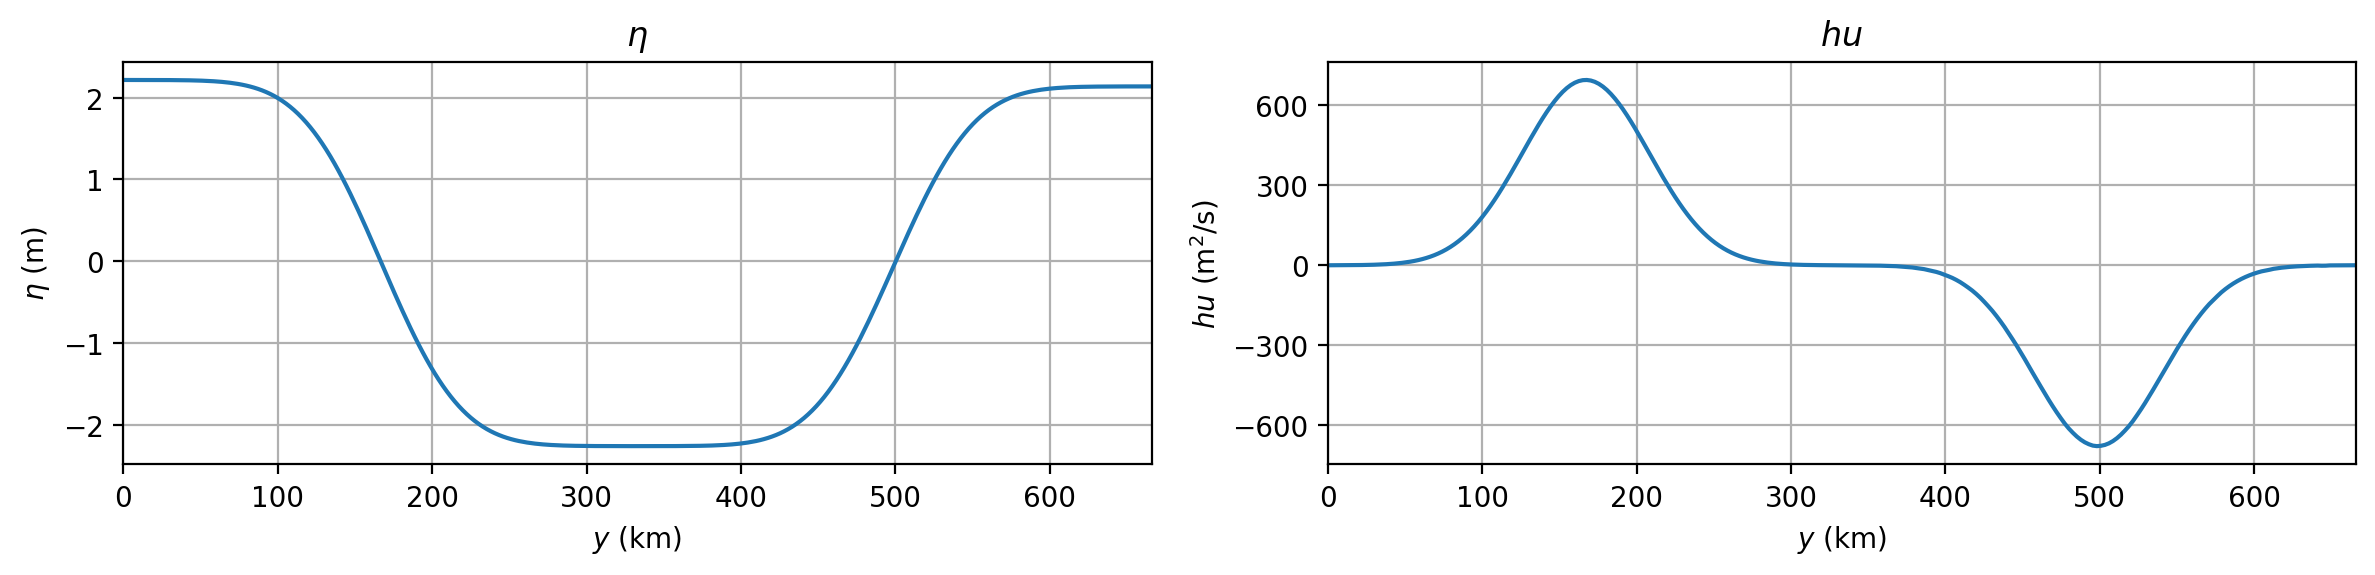

In [7]:
dy = args['dy']
ny = args['ny']
y = np.linspace(dy/2, dy*(ny-0.5), num=ny)
print(len(y), ny)
print((dy, ny*dy), (y[0], ny*dy - y[-1]))
y = y/1000

crossec_eta = init["eta0"][2:-2, 20]
crossec_hu = init["hu0"][2:-2, 20]
crossec_u = crossec_hu/(228+crossec_eta)

#fig, axs = plt.subplots(1,2, figsize=(13,3))
fig, axs = plt.subplots(1,2, figsize=(12, 3))

eta_im = axs[0].plot(y, crossec_eta)
axs[0].grid()
axs[0].set_title(r'$\eta$')
axs[0].set_xlabel(r'$y$ (km)')
axs[0].set_ylabel(r'$\eta$ (m)')


hu_im = axs[1].plot(y, crossec_hu)
axs[1].grid()
axs[1].set_title(r'$hu$')
axs[1].set_xlabel(r'$y$ (km)')
axs[1].set_ylabel(r'$hu$ (m$^2$/s)')
axs[1].set_yticks([-600, -300, 0, 300, 600])

for i in range(2):
    axs[i].set_xlim([0,ny*dy/1000])

plt.tight_layout()
save = True
if save: plt.savefig("initial_state.pdf", format='pdf')